# Homework 2
Shannon Dow

### Question 1: 

$$ v'''(t) + v'(t) v(t) - \frac{\beta_1 + \beta_2 + \beta_3}{3} v'(t) =0, $$

where $\beta_1 < \beta_2 < \beta_3$.  It follows that
$$
v(t) = \beta_2 + (\beta_3 - \beta_2) \mathrm{cn}^2\left( \sqrt{ \frac{\beta_3 - \beta_1}{12}} t, \sqrt{\frac{\beta_3 - \beta_2}{\beta_3 - \beta_1}} \right)
$$
is a solution where $\mathrm{cn}(x,k)$ is the [Jacobi cosine function](https://en.wikipedia.org/wiki/Jacobi_elliptic_functions).  Some notations use $\mathrm{cn}(x,m)$ where $m = k^2$.  The second argument of the cn function is called the elliptic modulus.  The corresponding initial conditions are

$$
v(0) = \beta_3, \\
v'(0) = 0,\\
v''(0) = -\frac{(\beta_3 - \beta_1)(\beta_3-\beta_2)}{6}.$$

We first turn it into a system
$$
u_1'(t) =  v'(t) = u_2(t),\\
u_2'(t) = v''(t) = u_3(t),\\
u_3''(t) = \frac{\beta_1 + \beta_2 + \beta_3}{3} u_2(t) -  u_2(t)u_1(t).
$$

So, set $c = \frac{\beta_1 + \beta_2 + \beta_3)}{3}$
$$
f(u) = \begin{bmatrix} u_2 \\ u_3 \\ u_1(c - u_2)\end{bmatrix}.
$$

Because it will come back again, we have
$$
D_u f(u) = \begin{bmatrix} 0 & 1 & 0 \\
0 & 0 & 1 \\
-u_2  & c - u_1 & 0 \end{bmatrix}.
$$

In [1]:
#import Pkg; Pkg.add("Plots")
using Plots 
#import Pkg; Pkg.add("Elliptic")
using Elliptic.Jacobi

In [2]:
β₁ = 0.
β₂ = 1.
β₃ = 10.
c = (β₁ + β₂ + β₃)/3
t = 0.:.01:10
v = t -> β₂ + (β₃ - β₂)*cn(sqrt((β₃-β₁)/12)*t, (β₃-β₂)/(β₃-β₁) )^2 # Julia uses the square of the elliptic modulus

#3 (generic function with 1 method)

In [3]:
f = u -> [u[2], u[3], u[2]*(c - u[1])]
u₀ = [β₃,0.,-1.0/6*(β₃-β₁)*(β₃-β₂)]

3-element Array{Float64,1}:
  10.0              
   0.0              
 -14.999999999999998

In [4]:
T = 10 # Final time.
k = .02
p = 7
data = zeros(p)
ks = zeros(p)
for i = 1:p
    k = k/2
    n = convert(Int64,ceil(T/k))
    println("Number of time steps = ", n)
    U = zeros(3,n+1) # To save the solution values
    U[:,1] = u₀
    t = zeros(n+1,1)
    t[1] = 0.
    max_iter = 10
    for i = 2:n+1
        t[i] = t[i-1] + k
        Y1 = U[:,i-1]
        f1 = f(Y1)    
        Y2 = U[:,i-1] + (k/2)*f1
        f2 = f(Y2)
        Y3 = U[:,i-1] + (5*k/9)*f1 -(2*k/9)*f2
        f3 = f(Y3)
        U[:,i] = U[:,i-1] + (k/2)*f1 + 2*k*f2 - ((3*k)/2)*f3
    end
    data[i] = abs(U[1,end] - v(t[end]))
    ks[i] = k
end
data_rk = data

Number of time steps = 1000
Number of time steps = 2000
Number of time steps = 4000
Number of time steps = 8000
Number of time steps = 16000
Number of time steps = 32000
Number of time steps = 64000


7-element Array{Float64,1}:
 0.0001228247622817591
 1.4824382638334299e-5
 1.820113190387218e-6 
 2.2545272893026436e-7
 2.8049532474483385e-8
 3.5270208975646256e-9
 5.384346302150789e-10

In [5]:
data_rk

7-element Array{Float64,1}:
 0.0001228247622817591
 1.4824382638334299e-5
 1.820113190387218e-6 
 2.2545272893026436e-7
 2.8049532474483385e-8
 3.5270208975646256e-9
 5.384346302150789e-10

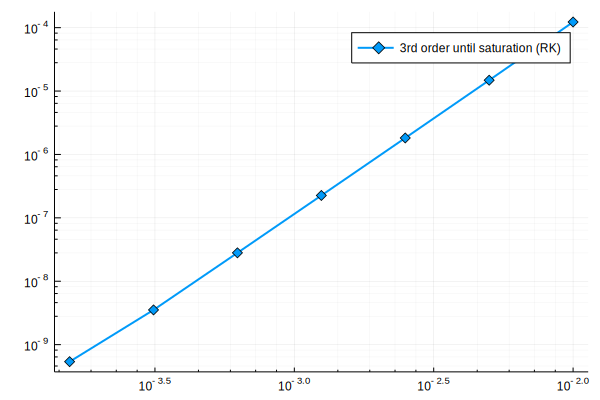

In [6]:
plot!(ks,data,lw=2,ms=5,marker=:d, minorgrid = true, xaxis=:log, yaxis= :log,label="3rd order until saturation (RK)")


In [15]:
using Printf
data_table = zeros(7);
for j = 2:7
    data_table[j] = data_rk[j-1]/data_rk[j]
end
data_table


7-element Array{Float64,1}:
 0.0              
 8.28532056128578 
 8.144758642829515
 8.073147745974742
 8.037664411531933
 7.952754828827729
 6.550509011940315

In [21]:
@printf("k        | RK 3rd Order  |\n")
for j=2:7
    @printf("%f | %0.4f        |\n", ks[j],data_table[j])
end

k        | RK 3rd Order  |
0.005000 | 8.2853        |
0.002500 | 8.1448        |
0.001250 | 8.0731        |
0.000625 | 8.0377        |
0.000313 | 7.9528        |
0.000156 | 6.5505        |
